# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# And this other viz library I haven't worked with
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Tips/tips.csv). 

### Step 3. Assign it to a variable called tips

In [2]:
csv = 'tips.csv'

tips = pd.read_csv(csv)

tips[:5]

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 4. Delete the Unnamed 0 column

In [3]:
%timeit tips.iloc[:, 1:]
# Seems easy, but is it the best bet?

tips.head()

272 µs ± 4.94 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# There approach was del keyword
del tips['Unnamed: 0']

In [5]:
tips[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Step 5. Plot the total_bill column histogram

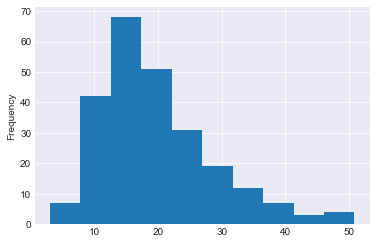

In [6]:
tips.total_bill.plot(kind='hist')

sns.despine()

In [7]:
sns.get_dataset_names()
# Oh coooool

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

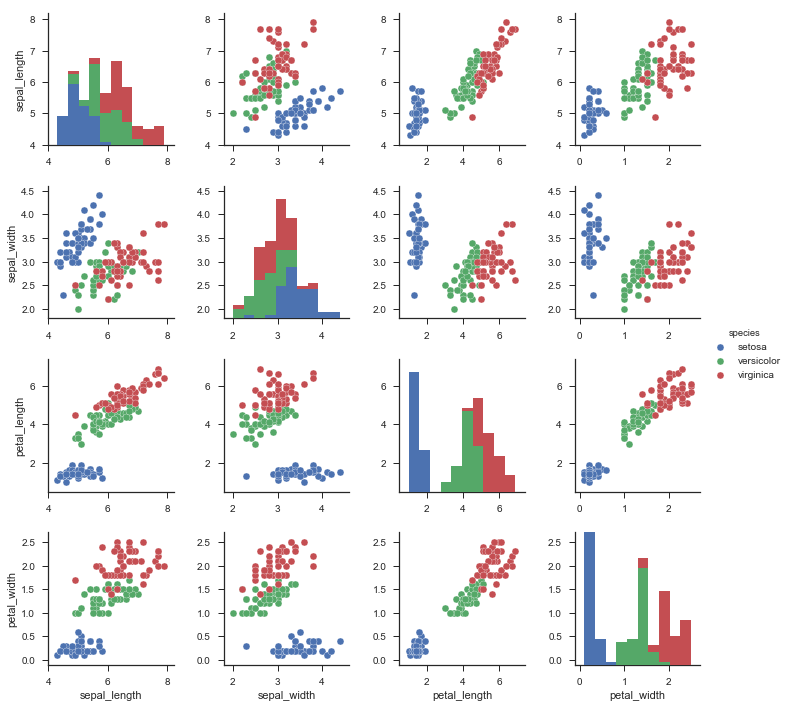

In [8]:
df = sns.load_dataset('iris')
sns.set(style='ticks')
sns.pairplot(df, hue='species')

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

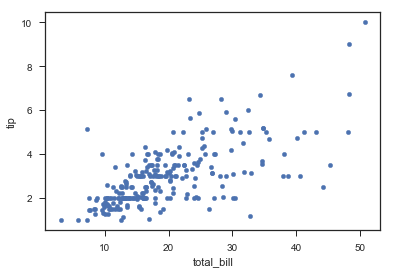

In [9]:
tips[['total_bill', 'tip']].plot(kind='scatter', x='total_bill', y='tip')

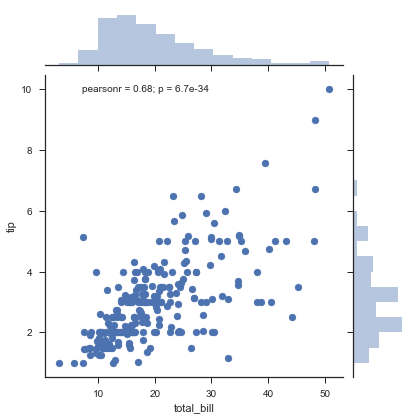

In [10]:
# Could have a done wayyyyy cooler version using a sns jointplot
sns.jointplot(x='total_bill', y='tip', data=tips)

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

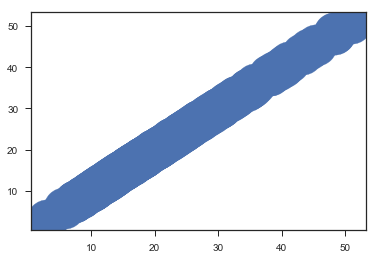

In [11]:
plt.scatter(x=tips.total_bill, y=tips.total_bill, s=tips.size) #hella wrong

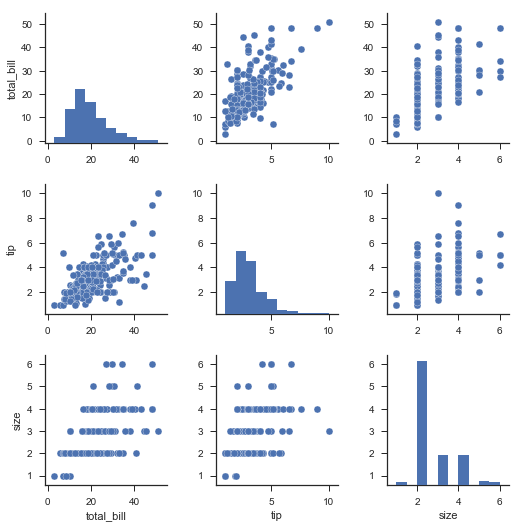

In [12]:
sns.pairplot(data=tips)

### Step 8. Present the relationship between days and total_bill value

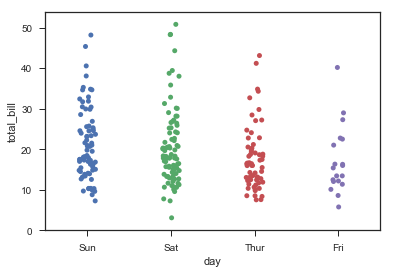

In [13]:
# Try using a sns stripplot which is single categorical variable

sns.stripplot(x='day', y='total_bill', data=tips, jitter=True)

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

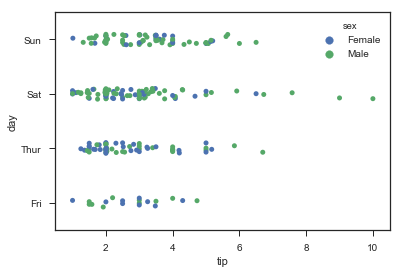

In [14]:
# Layering in another dimension
sns.stripplot(y='day', x='tip', data=tips, jitter=True, hue='sex')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

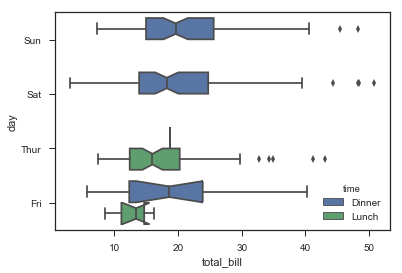

In [15]:
sns.boxplot(x='total_bill', y='day', data=tips, hue='time', notch=True)

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

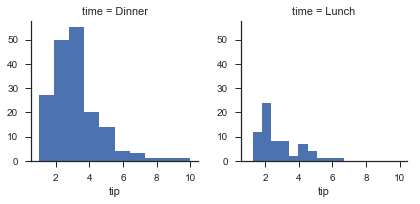

In [16]:
# sns.FacetGrid(tips, despine=True,  col='time').map(plt.hist, 'tip')

hist = sns.FacetGrid(tips, despine=True,  col='time')

hist.map(plt.hist, 'tip')

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

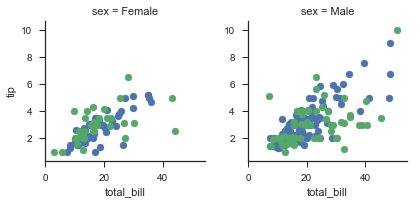

In [30]:
scatter_graph = sns.FacetGrid(tips, col='sex', hue='smoker')

scatter_graph.map(plt.scatter, 'total_bill', 'tip')

### BONUS: Create your own question and answer it using a graph.

In [49]:
# Do a made up pairplot with additional fake data (e.g. age?)
tips.info()

tips['fake_age'] = np.random.randint(20, high=60, size=len(tips))

tips[:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
fake_age      244 non-null int32
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 14.4+ KB


,total_bill,tip,sex,smoker,day,time,size,fake_age
0,16.99,1.01,Female,No,Sun,Dinner,2,52
1,10.34,1.66,Male,No,Sun,Dinner,3,29
2,21.01,3.50,Male,No,Sun,Dinner,3,36
3,23.68,3.31,Male,No,Sun,Dinner,2,30
4,24.59,3.61,Female,No,Sun,Dinner,4,32


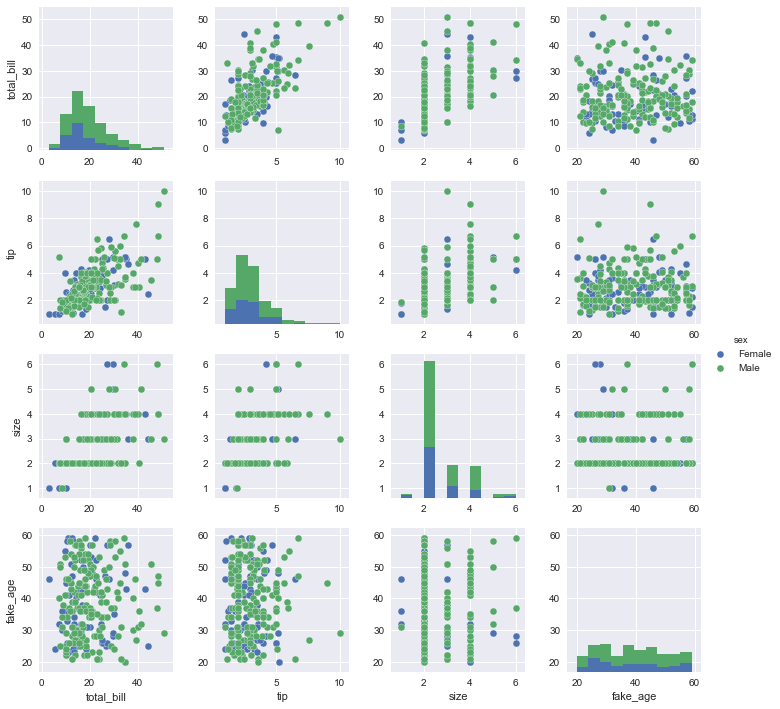

In [55]:
sns.pairplot(tips, hue='sex')